<a href="https://colab.research.google.com/github/BhanuPShahi/Airbnb-Bookings-Analysis/blob/main/Capstone_Project_AirBnB_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Name - **AirBnB Bookings Analysis**

##### **Project Type**    - EDA
##### **Contribution**    - Individual

### **Links**
* **Github:** https://github.com/BhanuPShahi/Airbnb-Bookings-Analysis
* **PPT:** https://docs.google.com/presentation/d/1j_pyrVFgXY0VUMscrMEC55qWad3CMscaRpscKyVRK2o/edit#slide=id.p1

# **Problem Statement and Objective**

Introduction -

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

Dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

Explore and analyze the data to discover key understandings (not limited to these) such as :

1.What can we learn about different hosts and areas?

2.What can we learn from predictions? (ex: locations, prices, reviews, etc)

3.Which hosts are the busiest and why?

4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?

# ***Let's Begin !***

## ***1. Know Your Data***

##Importing Libraries


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


##Loading the data set

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#loading the data file and creating a dataframe
path='/content/drive/MyDrive/AB/Cohort Nilgiri/Capstone Projects/AirBnB Bookings Analysis/Airbnb NYC 2019.csv'
airbnb_df=pd.read_csv(path)

## ***2. Understanding Data & Initial Preprocessing***

Moving forward to the next stage, our focus is on gaining a deeper understanding of the data and undertaking the initial preprocessing steps. These initial preprocessing efforts are crucial for enhancing the usability of the data in subsequent analyses.

###Exploring the data


In this step we are going to perform the following operations..
*   Checking the shape of the dataframe.
*   Checking the info of the dataset.
*   Printing the head of the dataset.
*   Checking the summary of the dataset.




In [4]:
#checking the shape of airbnb_df
airbnb_df.shape

(48895, 16)

In [5]:
#checking the info of airbnb_df
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
airbnb_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [7]:
#Printing the summary of numerical attributes
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**What are neighbourhoods?**

### *Neighborhoods* are a way to help travelers make informed decisions about where to stay when planning a trip. When visiting a new city, it can be helpful to know which neighborhoods may fit your interests and the purpose of your trip.

###**Handling the missing values**

###Check for Missing Data

In [8]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

This airbnb_df dataset contains following columns:
*  id -  It contains the unique id of the listings.
*  name - It contains the description of the listing. The more beautiful and attractive the name is the more people it attract.
*  host_id - It contains unique host_id related to every host_name.
*  host_name -It contains host name of the respective hosts.
*  neighbourhood_group - It contains five neighbourhood groups of NewYork city.
*  neighbourhood - It contains the sub part of neighbouhood group.
*  latitude - It contains latitudes of the listed location.
*  longitude -It contains longitudes of the listed location.
*  room_type - It is a categorical column which contains the room types of the listings.
*  price - It contains prices of the listings.
*  minimum_nights - It restricts the minimum number of nights for booking.
*  number_of_reviews - It contains the number of reviews of that particular listing.
*  last_review - It contains the last review date of that listing.
*  reviews_per_month - It contains the number of reviews received per month by that listing.
*  calculated_host_listings_count - It contains the total number of listings one particular host has.
*  availability_365 - It reflects the current availability of the listing in a year.


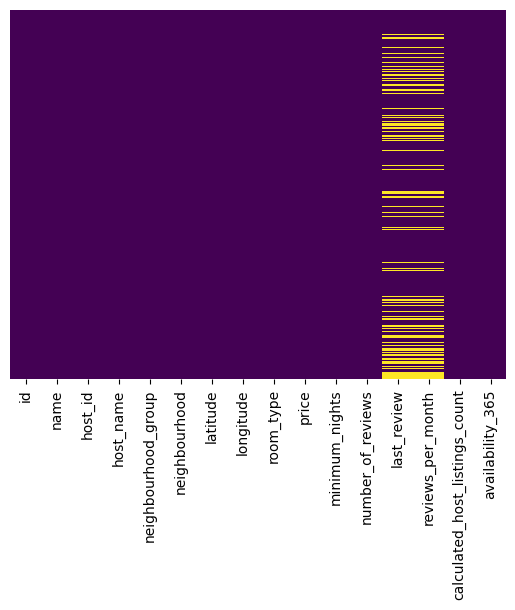

In [9]:
#checking the missing data in the dataset
sns.heatmap(airbnb_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.rcParams['figure.figsize'] = (10, 5)


###Cleaning the data

I am replacing NaN values of 'reviews_per_month' column with 0.

In [10]:
#replacing NaN values of 'reviews_per_month' column with 0
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)
# sns.heatmap(airbnb_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Checking the rows having null value in name and host_name column.**

In [11]:
airbnb_df[airbnb_df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,0.00,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,0.00,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,0.00,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,0.00,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,0.00,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,0.00,5,0


We can see that 10 out of 16 of rows having **NaN** as name value have 0 reviews.
There may be a case that while listing the name was not entered and that's why people are not prefering those places.
So i am dropping those rows.

In [12]:
#dropping those rows having null name value
new_airbnb_df=airbnb_df[~airbnb_df['name'].isnull()]

In [13]:
airbnb_df[airbnb_df['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,0.00,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,0.00,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


In [14]:
#dropping those rows having null host_name value
new_airbnb_df=new_airbnb_df[~new_airbnb_df['host_name'].isnull()]
new_airbnb_df.shape

(48858, 16)

## ***3. Exploratory Data Analysis***

###Plotting Rental listings on NY city map based on their latitude and longitude.

In [15]:
!pip install geopandas

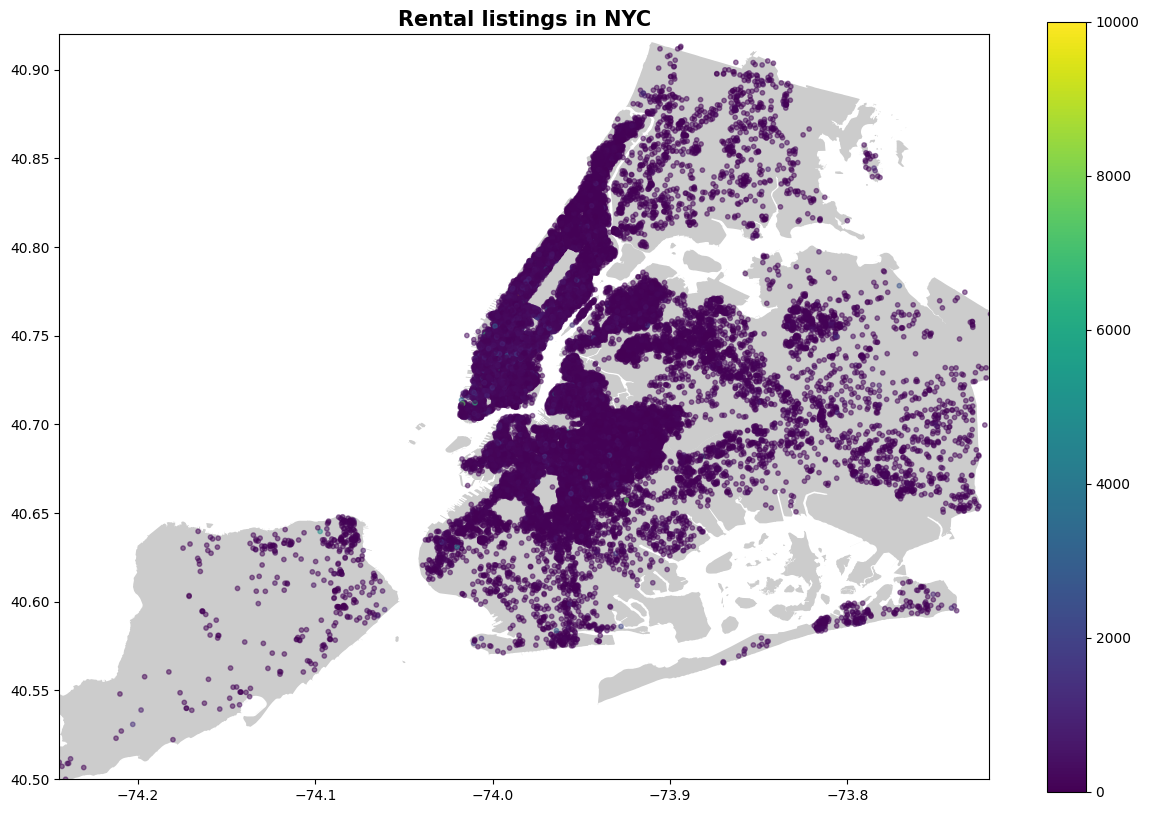

In [16]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
#loading the newyork city map
street_map = gpd.read_file('/content/drive/MyDrive/AB/Cohort Nilgiri/Capstone Projects/AirBnB Bookings Analysis/Borough Boundaries/geo_export_1e2a2aa9-e199-431f-8868-79b2b9366ce2.shp')

# zip x and y coordinates
geometry = [Point(xy) for xy in zip(airbnb_df['longitude'], airbnb_df['latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(airbnb_df,geometry = geometry)

# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,10))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='price',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
plt.title('Rental listings in NYC', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.24442,-73.72)
plt.ylim( 40.49979,40.92)
# show map
plt.show()

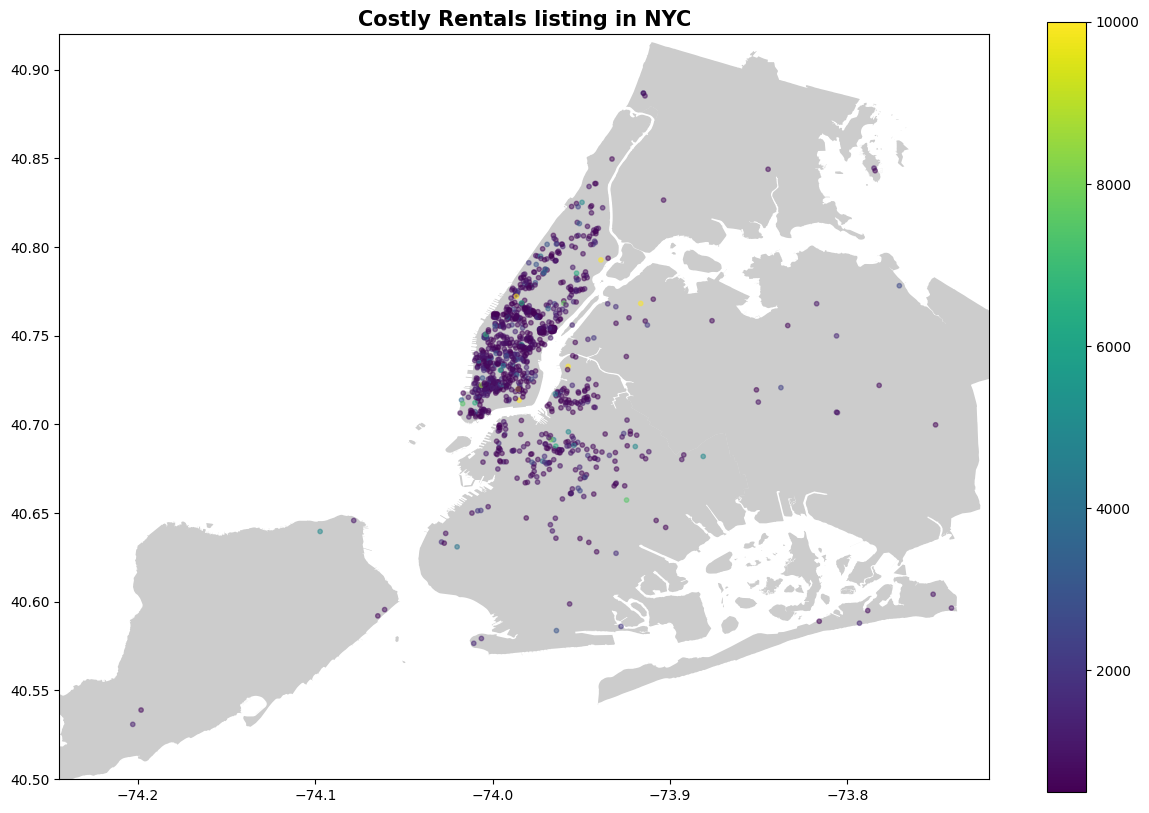

In [17]:
#Extracting those rows having prices greater than 500
high_price_airbnb_df=airbnb_df[airbnb_df['price']>500]
# zip x and y coordinates
geometry = [Point(xy) for xy in zip(high_price_airbnb_df['longitude'], high_price_airbnb_df['latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(high_price_airbnb_df,geometry = geometry)

# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,10))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='price',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
plt.title('Costly Rentals listing in NYC', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.24442,-73.72)
plt.ylim( 40.49979,40.92)
# show map
plt.show()

*  Most listings are in Manhattan region followed by Brooklyn region and least are in Staten island which can be seen from the density of the map.
*  The Central area of Manhattan region has no listings.That is a park named **Central Park** which comprises 6 percent of Manhattan's land area.
*  Most costly listings ( prices > 500$ ) are concentrated in Manhattan region and somewhat in Brooklyn too.

In [18]:
high_price_airbnb_df.shape

(1044, 16)

<Figure size 1300x700 with 0 Axes>

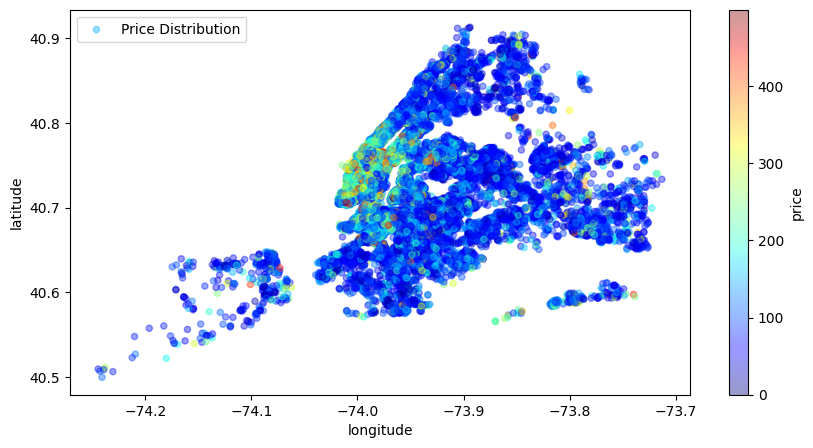

In [19]:
plt.figure(figsize=(13,7))
ax=airbnb_df[airbnb_df.price<500].plot(kind='scatter', x='longitude',y='latitude',label='Price Distribution',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
ax.legend()
plt.ioff()
plt.show()

*  Here we can see that room type and neighborhood have an effect on the listing price, but not the number of listings in the neighborhood.
*  Manhattan has more high price listing as well as room-types like entire-home and private rooms are also costlier.

###Exploring the categorical columns

**Visualizing different locations.**

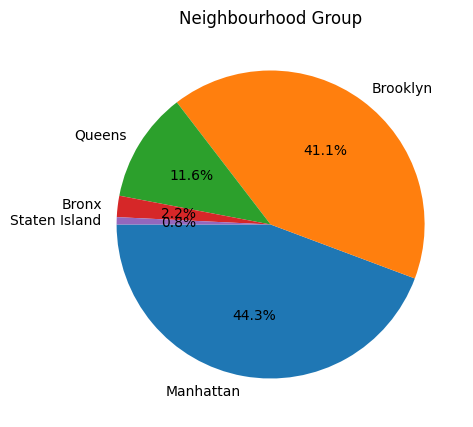

In [20]:
plt.figure(figsize=(10,5))
plt.title("Neighbourhood Group")
g = plt.pie(airbnb_df.neighbourhood_group.value_counts(), labels=airbnb_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

In [21]:
#Visualising the data according to area
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_style('whitegrid')
sns.countplot(x='neighbourhood_group',data=airbnb_df)

<Axes: xlabel='neighbourhood_group', ylabel='count'>

*  Manhattan is the most demanded location followed by Brooklyn while Staten Island is the least in demand may be due to location factor as it seems to be isolated.

**Visualizing different Room-Types**

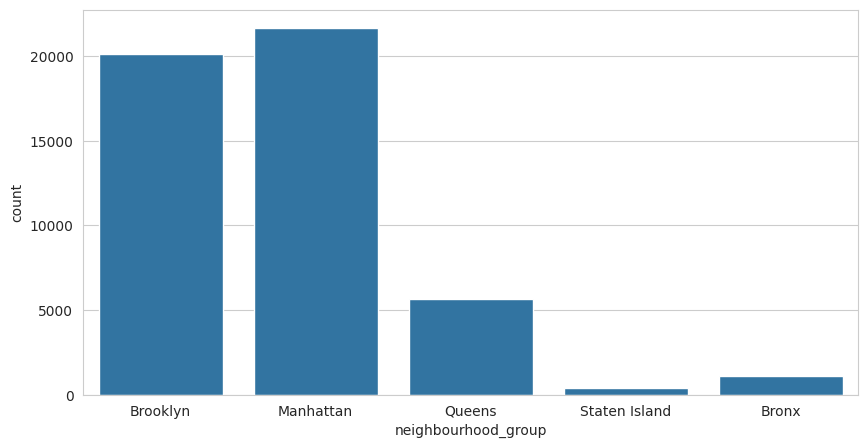

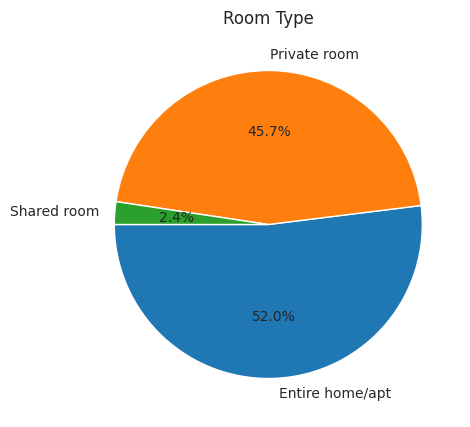

In [22]:
plt.figure(figsize=(10,5))
plt.title("Room Type")
g = plt.pie(airbnb_df.room_type.value_counts(), labels=airbnb_df.room_type.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

In [23]:
#visualising the data according to room_type
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_style('whitegrid')
sns.countplot(x='room_type',data=airbnb_df)

<Axes: xlabel='room_type', ylabel='count'>

**Conclusion**
*  Among the different room types available, the most demanded ones are entire-homes/apt followed by private-rooms and lastly shared rooms.
*  People are mostly preferring entire home/apt or private rooms means they are valuing their comfort and privacy  more than money.

**Visualizing different room-types according to different locations.**

In [24]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_style('whitegrid')
sns.countplot(x='neighbourhood_group',hue='room_type',data=airbnb_df)

<Axes: xlabel='room_type', ylabel='count'>

**Conclusion**
*  In Manhattan people are mostly prefering Entire-home/apt which reflects their good economic condition or the city may be a good family vacation place having parks like **Central Park**.
*  Brooklyn is somewhat similar to Manhattan.
*  For Staten island there are minimum number of listings and have only 9 shared-room listings.

In [25]:
airbnb_df[(airbnb_df['neighbourhood_group']=='Staten Island') & (airbnb_df['room_type']=='Shared room')].shape

(9, 16)

### **Finding prices of different locations with their corresponding room_type**

### Analysing Different locations according to their room_type and corresponding median prices

In [26]:
#extracting a df from airdnd_df
price_df = airbnb_df[['neighbourhood_group','room_type','price']]
#grouping this data frame according to their neighbourhood_group and room_type and assigning median prices
median_price_df =price_df.groupby(['neighbourhood_group','room_type']).median().reset_index()

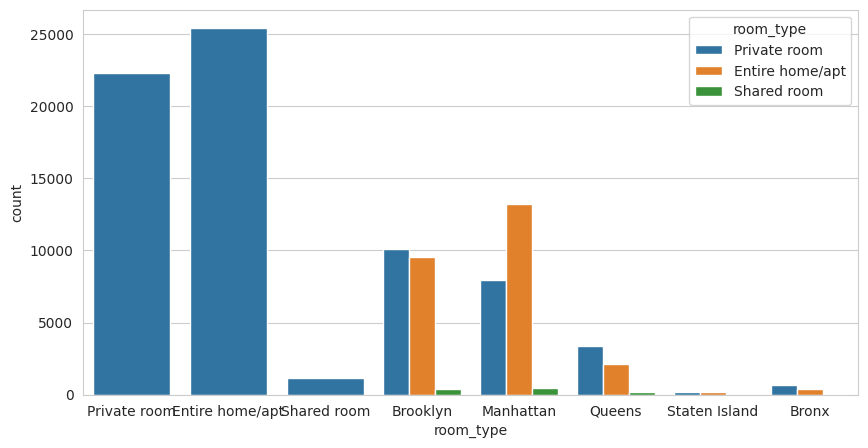

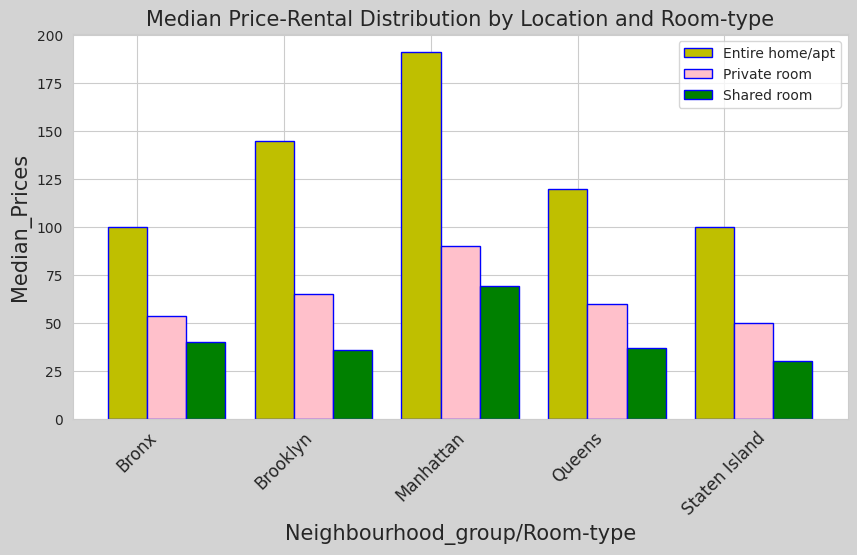

In [27]:
#getting the unique locations
locations = median_price_df.neighbourhood_group.unique()
x_rooms1 = [0.8, 3.8, 6.8, 9.8, 12.8]
x_rooms2 = [1.6, 4.6, 7.6, 10.6, 13.6]
x_rooms3 = [2.4, 5.4, 8.4, 11.4, 14.4]
y_values1 = median_price_df[median_price_df['room_type'] == 'Entire home/apt']['price'].values
y_values2 = median_price_df[median_price_df['room_type'] == 'Private room']['price'].values
y_values3 = median_price_df[median_price_df['room_type'] == 'Shared room']['price'].values
fig,ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('lightgray')
plt.bar(x_rooms1, y_values1, color='y', edgecolor='b')
plt.bar(x_rooms2, y_values2, color='pink', edgecolor='b')
plt.bar(x_rooms3, y_values3, color='g', edgecolor='b')
ax.set_xticks(range(1,16,3))
ax.set_xticklabels(locations, fontsize='12')
for tick in ax.get_xticklabels():
  tick.set_rotation(45)
plt.xlabel('Neighbourhood_group/Room-type',fontsize='15')
plt.ylabel('Median_Prices', fontsize='15')
plt.legend(labels=median_price_df.room_type.unique(), loc='best')
plt.title('Median Price-Rental Distribution by Location and Room-type',fontsize='15')
plt.show()

**Conclusion**
*  Entire-home/apt of every location have higher prices followed by private-rooms and shared-rooms.
*  Manhattan is most demanded location followed by Brooklyn.
*  Manhattan is the costliest location for every room type may be due to their location or high demand followed by Brooklyn .
*  The price for private-room rentals of Manhattan is somewhat in the same range
of entire-home/apt rentals of other locations.


**Visualizing top 20 hosts and finding the reason behind it.**

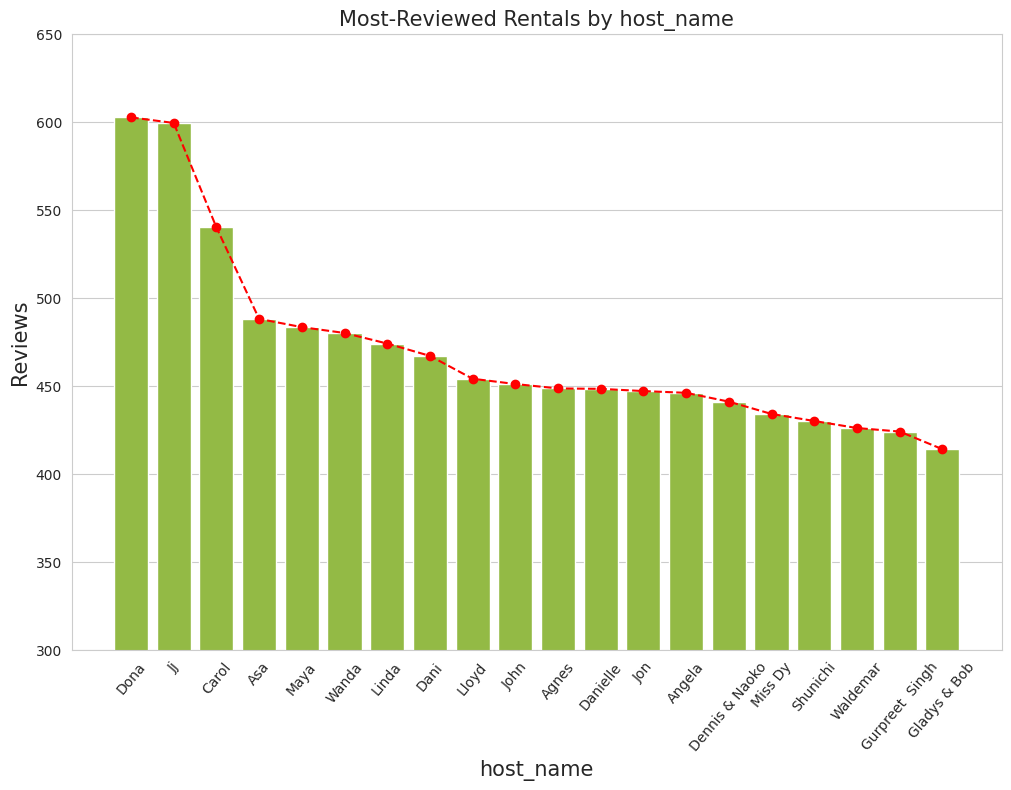

In [28]:
most_review_host_df = airbnb_df.sort_values('number_of_reviews',ascending=False)
top_reviewed_host_df = most_review_host_df.loc[:,['host_name','number_of_reviews']][:30]
top_reviewed_host_df = top_reviewed_host_df.groupby('host_name').mean().sort_values('number_of_reviews',ascending=False).reset_index()
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x=top_reviewed_host_df['host_name'],y=top_reviewed_host_df['number_of_reviews'].values,color='yellowgreen',ax=ax)
plt.plot(top_reviewed_host_df['number_of_reviews'], marker='o', color='red',linestyle='--')
plt.ylabel('Reviews', fontsize='15')
plt.xlabel('host_name',fontsize='15')
plt.ylim((300,650))
for ax in ax.get_xticklabels():
  ax.set_rotation(50)
plt.title('Most-Reviewed Rentals by host_name',fontsize='15')
plt.show()
sns.set()

In [29]:
top_host=top_reviewed_host_df['host_name'].tolist()

In [30]:
top_host_dict={}
for elem in top_host:
  avg_price=airbnb_df[airbnb_df['host_name']==elem].price.mean()
  top_host_dict[elem]=avg_price

top_host_avg_price_df=pd.DataFrame(top_host_dict.items(), columns=['Host', 'avg_price'])
top_host_avg_price_df.set_index('Host', inplace=True)
# top_host_avg_price_df

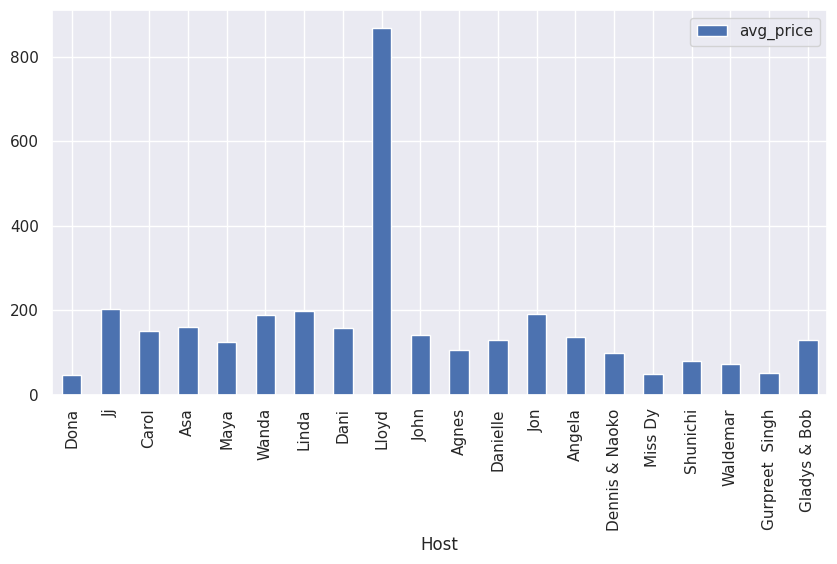

In [31]:
top_host_avg_price_df.plot(kind='bar')

plt.show()

**Conclusion**
*  Almost every popular host have rental listings in the price range between 50 and 200.

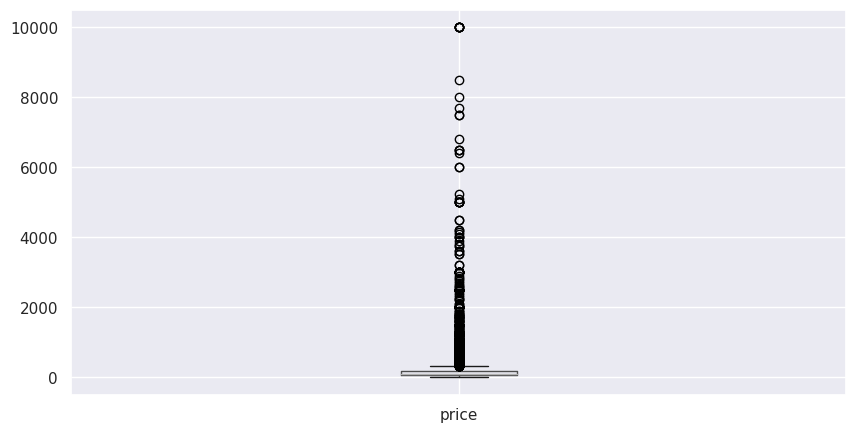

In [32]:
airbnb_df.boxplot(column=['price'])
plt.show()
plt.rcParams['figure.figsize'] = (20, 10)


In [33]:
area_df = airbnb_df[['neighbourhood']]
area_df['number_of_bookings']=airbnb_df['id']
grouped_area_df=area_df.groupby('neighbourhood').count().reset_index()
grouped_area_df.sort_values('number_of_bookings',ascending=False,inplace=True,ignore_index=True)

<ipython-input-33-3b6d3f6acc44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_df['number_of_bookings']=airbnb_df['id']


In [34]:
airbnb_df[airbnb_df['availability_365']==0].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0


In [35]:
airbnb_df.sort_values('last_review',ascending=False,inplace=True,ignore_index=True)
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.00,1,1
1,33119863,Queens Studio.,42540127,Tio,Queens,Bayside,40.77067,-73.78278,Entire home/apt,55,2,37,2019-07-08,10.37,1,6
2,34244391,A space like a home,258536261,Judy,Brooklyn,Cypress Hills,40.67959,-73.88302,Entire home/apt,100,2,11,2019-07-08,5.69,1,179
3,34231172,Fully renovated brick house floor in Brooklyn,59642348,Kevin,Brooklyn,Sunset Park,40.64550,-74.01262,Entire home/apt,95,1,9,2019-07-08,9.00,1,106
4,34204893,Gorgeous spacious 1 bedroom apartment,85773188,Mark,Brooklyn,Brighton Beach,40.57589,-73.96636,Entire home/apt,86,1,10,2019-07-08,9.09,1,20


In [36]:
grouped_area_df.head(5)

,neighbourhood,number_of_bookings
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971


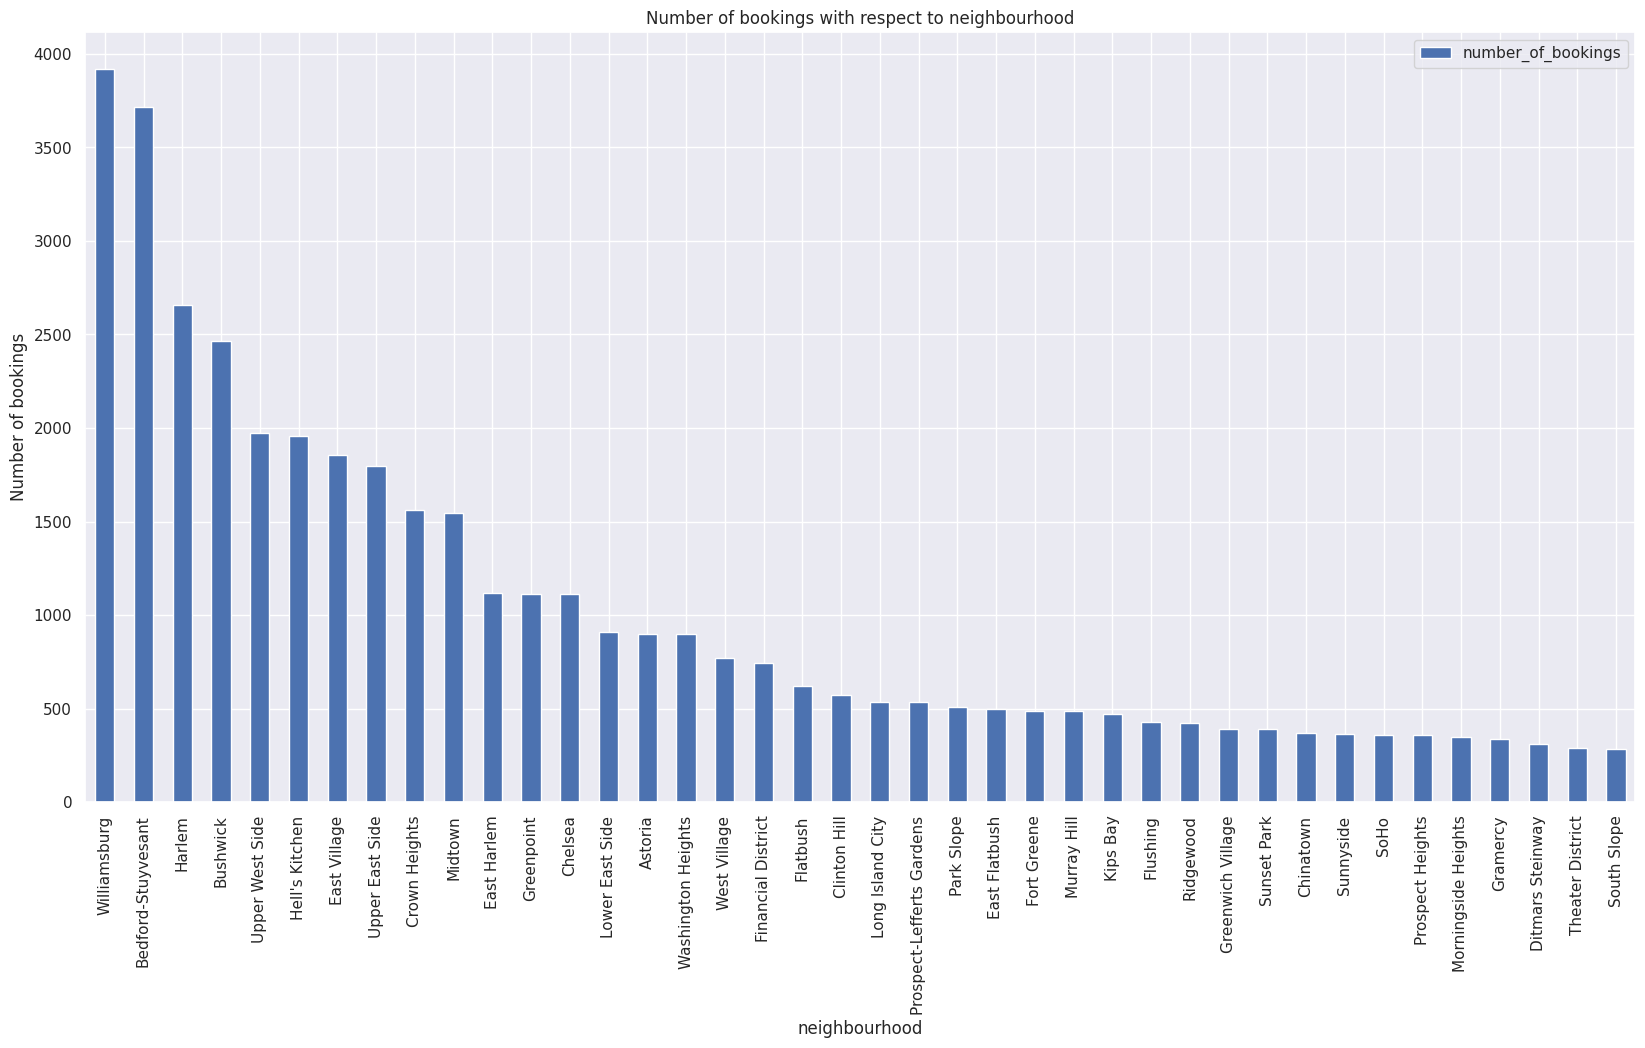

In [37]:
#plotting the top 40 preferred area
top_40_preferred_area_df=grouped_area_df[0:40]
top_40_preferred_area_df.plot(x = "neighbourhood", y = "number_of_bookings", kind = "bar")
plt.title('Number of bookings with respect to neighbourhood')
plt.ylabel('Number of bookings')
plt.xlabel('neighbourhood')
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()

### Area Analysis

*   Manhattan neighbourhood_group is most in demand followed by Brooklyn.





In [38]:
host_df=airbnb_df.groupby('host_name').count().reset_index()
host_df.sort_values('id',ascending=False,inplace=True,ignore_index=True)
host_df.shape


(11452, 16)

In [39]:
host_having_max_listings=airbnb_df[airbnb_df['calculated_host_listings_count']==airbnb_df.calculated_host_listings_count.max()]

In [40]:
host_having_max_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7454,32634874,Sonder | Stock Exchange | Pristine 1BR + Sofa Bed,219517861,Sonder (NYC),Manhattan,Financial District,40.70604,-74.01216,Entire home/apt,248,2,7,2019-06-26,2.59,327,294
8276,34341994,Sonder | 116 John | Polished 2BR + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70781,-74.00525,Entire home/apt,179,29,1,2019-06-24,1.00,327,339
8390,32224172,Sonder | Stock Exchange | Restful 1BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70752,-74.01046,Entire home/apt,235,2,7,2019-06-24,1.52,327,306
8638,32237811,Sonder | Stock Exchange | Design Studio + Laundry,219517861,Sonder (NYC),Manhattan,Financial District,40.70797,-74.01227,Entire home/apt,205,2,10,2019-06-24,2.54,327,338
8641,32237138,Sonder | Stock Exchange | Lively Studio + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70714,-74.01225,Entire home/apt,203,2,7,2019-06-24,1.88,327,338


In [41]:
place_having_max_reviews=airbnb_df[airbnb_df['number_of_reviews']==airbnb_df.number_of_reviews.max()]

###Analysis on availability_365 column

In [42]:
#extracting those rows having 0 value in availability_365 column
zero_availability_df=airbnb_df[airbnb_df['availability_365']==0]

There may be two possibilities for 0 value in availability column.


*   May be that place was previously available for booking but closed currently.
*   There may be a chance of bad entry.



In [43]:
#sorting them according to their last review date
zero_availability_df.sort_values('last_review',ascending=False,inplace=True,ignore_index=True)
print(zero_availability_df.shape)
zero_availability_df.head()

(17533, 16)


<ipython-input-43-0f820dd4a98d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_availability_df.sort_values('last_review',ascending=False,inplace=True,ignore_index=True)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,34151215,Bright and Artsy 2 Bedroom Apartment,257810280,Leslie,Brooklyn,Bedford-Stuyvesant,40.67935,-73.93715,Entire home/apt,100,1,5,2019-07-08,5.00,1,0
1,31714168,5 min away from LGA,213014559,Kam,Queens,East Elmhurst,40.76893,-73.87712,Entire home/apt,135,1,17,2019-07-08,3.57,2,0
2,25380654,"Cozy, Confortable, Modern spacious and nice Room",191621249,Geraldine,Manhattan,Chelsea,40.74284,-73.99842,Private room,99,1,95,2019-07-08,7.20,2,0
3,21264131,Beautiful Super Cozy Studio,67226812,RaShaan,Brooklyn,Bedford-Stuyvesant,40.68744,-73.94905,Entire home/apt,95,1,89,2019-07-08,4.43,1,0
4,13216246,Comfy Greenpoint room w/ easy access to Manhat...,6531491,Stephen,Brooklyn,Greenpoint,40.72217,-73.94800,Private room,75,1,55,2019-07-08,1.46,1,0


**Conclusion**

There are more than 17000 rows having availability as 0.
So this should be the case that those rental places are currently closed or not accepting new bookings.

We can check their last_review date and can assume that after that they are not operational.

In [44]:
zero_availability_df['neighbourhood_group'].value_counts().plot(kind='bar')


<Axes: >

###Price Analysis

In [45]:
#summary of descriptive statistics
airbnb_df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [46]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (20, 10)
sns.distplot(airbnb_df['price']);

<ipython-input-46-2e534463a3ec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airbnb_df['price']);


In [47]:
plt.hist(airbnb_df.price, color='green')
plt.xlabel('price')
plt.ylabel('number_of_bookings')
plt.rcParams['figure.figsize'] = (10, 5)

In [48]:
airbnb_df.sort_values('price',ascending=False,ignore_index=True).head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,0.00,1,83
1,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
2,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
3,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,0.00,1,365
4,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0


Here the price value like 0 and 10000 are outliers.

In [49]:
# list of numerical variables
numerical_features = [feature for feature in new_airbnb_df.columns if new_airbnb_df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
new_airbnb_df[numerical_features].describe()

Number of numerical variables:  10


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Plotting the Correlation Matrix**

In [50]:
corr = airbnb_df.corr()
# corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-50-7d3419c9ae96>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = airbnb_df.corr()
<ipython-input-50-7d3419c9ae96>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.00,0.59,-0.00,0.09,0.01,-0.01,-0.32,0.18,0.13,0.09
host_id,0.59,1.00,0.02,0.13,0.02,-0.02,-0.14,0.21,0.15,0.20
latitude,-0.00,0.02,1.00,0.08,0.03,0.02,-0.02,-0.02,0.02,-0.01
longitude,0.09,0.13,0.08,1.00,-0.15,-0.06,0.06,0.14,-0.11,0.08
price,0.01,0.02,0.03,-0.15,1.00,0.04,-0.05,-0.05,0.06,0.08
minimum_nights,-0.01,-0.02,0.02,-0.06,0.04,1.00,-0.08,-0.12,0.13,0.14
number_of_reviews,-0.32,-0.14,-0.02,0.06,-0.05,-0.08,1.00,0.59,-0.07,0.17
reviews_per_month,0.18,0.21,-0.02,0.14,-0.05,-0.12,0.59,1.00,-0.05,0.16
calculated_host_listings_count,0.13,0.15,0.02,-0.11,0.06,0.13,-0.07,-0.05,1.00,0.23
availability_365,0.09,0.20,-0.01,0.08,0.08,0.14,0.17,0.16,0.23,1.00


# **Conclusion**

### Key Insights after detailed EDA

**Accommodation Preferences:** New York City residents and visitors exhibit distinct preferences, favoring entire homes/apartments for longer stays and private rooms for shorter durations.

**Neighborhood Influence:** Manhattan emerges as the neighborhood-group with the highest number of listings and the highest costs, likely influenced by its proximity to popular attractions like Central Park and Times Square.

**Host Strategies:** Popular hosts maintain mean listing prices in the $50 to $200 range, balancing affordability with the value offered to guests.

**Marketing Impact:** The correlation between specific keywords in listing descriptions and listing traffic emphasizes the importance of effective marketing strategies for hosts.

**Price Determinants:** Pricing of listings primarily depends on neighborhood area and room types, rather than the number of available listings.

**Accommodation Trends:** Minimum-night restrictions are prevalent, especially for private or shared accommodations. As the minimum number of nights increases, there is a growing preference for entire homes/apartments.

These insights offer valuable guidance for hosts in optimizing pricing strategies, marketing efforts, and accommodation offerings in the competitive AirBnB market.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***